### Business requirement

Main business requiement of this project is to identify best place for opening of new Bank's Branch within same city as Head Office. The city of opening is Almaty, the previous capital of Kazakhstan with the population of around 2 millions and most developed economy in Central Asia. Almost all of the headquarters of banks are located in this city, as well as the financial regulator Central Bank. Main requirement of the business is to identify places with high potentials for business activities, trade and high population density. The main purpose of the contractor is to enhance Retail Business, Remmittances and Utility payments. Therefore, we require to identify locations of all banks, most of organizations and make a recomendation for the Bank's management to open a new Branch.

I will use location of Head Office and radius of 10 killometers to define better place for the location of new Branch.

Lets import required libraries to start this assignment.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |   py37hc8dfbb8_1         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages wil

In [2]:
CLIENT_ID = 'CFU5RK1JLBW5GUZ1IRARNERG1QUORXDTNEWK1X42UUK22PMV' # your Foursquare ID
CLIENT_SECRET = 'HJQJG3DZDVHDGVGAF5OY23MIHB0012TV3VRLLJHGPJDFP5VM' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CFU5RK1JLBW5GUZ1IRARNERG1QUORXDTNEWK1X42UUK22PMV
CLIENT_SECRET:HJQJG3DZDVHDGVGAF5OY23MIHB0012TV3VRLLJHGPJDFP5VM


In [3]:
address = '105 Dostyk Ave, Almaty'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.2259312 76.9610195


In [4]:
search_query = 'Bank'
radius = 10000
print(search_query + ' .... OK!')

Bank .... OK!


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=CFU5RK1JLBW5GUZ1IRARNERG1QUORXDTNEWK1X42UUK22PMV&client_secret=HJQJG3DZDVHDGVGAF5OY23MIHB0012TV3VRLLJHGPJDFP5VM&ll=43.2259312,76.9610195&v=20180604&query=Bank&radius=10000&limit=30'

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8800b6ad1ab4001bc28296'},
 'response': {'venues': [{'id': '4f10173de4b038020129fdef',
    'name': 'Home Credit Bank / Хоум Кредит Банк',
    'location': {'address': 'БЦ «Сарканд»',
     'crossStreet': 'ул. Фурманова, 248',
     'lat': 43.224292061779366,
     'lng': 76.9538708499919,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.224292061779366,
       'lng': 76.9538708499919}],
     'distance': 607,
     'postalCode': '050020',
     'cc': 'KZ',
     'city': 'Алматы',
     'state': 'Алматы',
     'country': 'Қазақстан',
     'formattedAddress': ['050020',
      'Алматы',
      'Алматы',
      'БЦ «Сарканд» (ул. Фурманова, 248)',
      'Қазақстан']},
    'categories': [{'id': '4bf58dd8d48988d10a951735',
      'name': 'Bank',
      'pluralName': 'Banks',
      'shortName': 'Bank',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/financial_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v

In [7]:
venues = results['response']['venues']

# tranform venues into a dataframe

dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,4f10173de4b038020129fdef,БЦ «Сарканд»,KZ,Алматы,Қазақстан,"ул. Фурманова, 248",607,"[050020, Алматы, Алматы, БЦ «Сарканд» (ул. Фур...","[{'label': 'display', 'lat': 43.22429206177936...",43.224292,76.953871,050020,Алматы,Home Credit Bank / Хоум Кредит Банк,v-1585971453
1,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,55bf4d16498e8c0db4db947f,"мкр. Самал-2, 111.",KZ,Алматы,Қазақстан,NaN,804,"[Алматы, Алматы, мкр. Самал-2, 111., Қазақстан]","[{'label': 'display', 'lat': 43.23264426418892...",43.232644,76.957344,NaN,Алматы,Halyk Bank,v-1585971453
2,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,50934de77ab45785668cfdbb,105 Dostyk Ave.,KZ,Алматы,Қазақстан,Khadzhimukan Str.,14,"[050051, Алматы, Алматы, 105 Dostyk Ave. (Khad...","[{'label': 'display', 'lat': 43.22582233565949...",43.225822,76.960922,050051,Алматы,National Bank of Pakistan in Kazakhstan,v-1585971453
3,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,5731a702498ed5592d1e935e,Аль-Фараби 40,KZ,Алматы,Қазақстан,Сейфуллина,1583,"[Алматы, Алматы, Аль-Фараби 40 (Сейфуллина), Қ...","[{'label': 'display', 'lat': 43.2260837102264,...",43.226084,76.941498,NaN,Алматы,Halyk Bank HQ (Қазақстан Халық Банкі),v-1585971453
4,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,4e6f1bfb62e1d475e20ac797,Аль-Фараби 36/В,KZ,Алматы,Қазақстан,Almaty Financial District,1427,"[050059, Алматы, Алматы, Аль-Фараби 36/В (Alma...","[{'label': 'display', 'lat': 43.22619975720432...",43.226200,76.943422,050059,Алматы,Al Hilal Bank Kazakhstan,v-1585971453


In [8]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Home Credit Bank / Хоум Кредит Банк,Bank,БЦ «Сарканд»,KZ,Алматы,Қазақстан,"ул. Фурманова, 248",607,"[050020, Алматы, Алматы, БЦ «Сарканд» (ул. Фур...","[{'label': 'display', 'lat': 43.22429206177936...",43.224292,76.953871,050020,Алматы,4f10173de4b038020129fdef
1,Halyk Bank,Bank,"мкр. Самал-2, 111.",KZ,Алматы,Қазақстан,NaN,804,"[Алматы, Алматы, мкр. Самал-2, 111., Қазақстан]","[{'label': 'display', 'lat': 43.23264426418892...",43.232644,76.957344,NaN,Алматы,55bf4d16498e8c0db4db947f
2,National Bank of Pakistan in Kazakhstan,Bank,105 Dostyk Ave.,KZ,Алматы,Қазақстан,Khadzhimukan Str.,14,"[050051, Алматы, Алматы, 105 Dostyk Ave. (Khad...","[{'label': 'display', 'lat': 43.22582233565949...",43.225822,76.960922,050051,Алматы,50934de77ab45785668cfdbb
3,Halyk Bank HQ (Қазақстан Халық Банкі),Office,Аль-Фараби 40,KZ,Алматы,Қазақстан,Сейфуллина,1583,"[Алматы, Алматы, Аль-Фараби 40 (Сейфуллина), Қ...","[{'label': 'display', 'lat': 43.2260837102264,...",43.226084,76.941498,NaN,Алматы,5731a702498ed5592d1e935e
4,Al Hilal Bank Kazakhstan,Bank,Аль-Фараби 36/В,KZ,Алматы,Қазақстан,Almaty Financial District,1427,"[050059, Алматы, Алматы, Аль-Фараби 36/В (Alma...","[{'label': 'display', 'lat': 43.22619975720432...",43.226200,76.943422,050059,Алматы,4e6f1bfb62e1d475e20ac797
5,Kaspi Bank (Head Office),Bank,"ул. Наурызбай батыра,154А",KZ,Алматы,Қазақстан,между пр. Абая и ул. Сатпаева,2413,"[050022, Алматы, Алматы, ул. Наурызбай батыра,...","[{'label': 'display', 'lat': 43.24000616046664...",43.240006,76.938377,050022,Алматы,5042fa9ce4b05698ba944054
6,Bank Centrcredit,Bank,NaN,KZ,NaN,Қазақстан,NaN,2174,[Қазақстан],"[{'label': 'display', 'lat': 43.23798564304828...",43.237986,76.939924,NaN,NaN,4fbf4493e4b02ad5dba1bdfc
7,"ГО Банк ""ЦентрКредит"" / HO Bank ""CenterCredit""",Bank,"просп. Аль-Фараби, 38",KZ,Алматы,Қазақстан,ул. Сейфулина,1449,"[050059, Алматы облысы, Алматы, просп. Аль-Фар...","[{'label': 'display', 'lat': 43.226361459677, ...",43.226361,76.943156,050059,Алматы облысы,4e8ef4688b814000385828a2
8,KazKom Bank,Bank,"KIMEP, ул. Абая",KZ,Алматы,Қазақстан,ул. Валиханова,1938,"[Алматы, Алматы, KIMEP, ул. Абая (ул. Валихано...","[{'label': 'display', 'lat': 43.242573, 'lng':...",43.242573,76.953966,NaN,Алматы,4fbcafa6e4b08c2bc804d017
9,Bank ExpoCredit HQ,Office,NaN,KZ,NaN,Қазақстан,NaN,384,[Қазақстан],"[{'label': 'display', 'lat': 43.22531578136093...",43.225316,76.956359,NaN,NaN,4f3e3150e4b02744e4669929


In [9]:
dataframe_filtered.name

0                Home Credit Bank / Хоум Кредит Банк
1                                         Halyk Bank
2            National Bank of Pakistan in Kazakhstan
3              Halyk Bank HQ (Қазақстан Халық Банкі)
4                           Al Hilal Bank Kazakhstan
5                           Kaspi Bank (Head Office)
6                                   Bank Centrcredit
7     ГО Банк "ЦентрКредит" / HO Bank "CenterCredit"
8                                        KazKom Bank
9                                 Bank ExpoCredit HQ
10                                      Bank RBK VIP
11                          Halyk Bank on Dostyk 109
12                                 Bank Centercredit
13                                        Kaspi Bank
14                          Группа Компаний Art-Bank
15                           Capital Bank Kazakhstan
16                                        Halyk Bank
17               Bank "PNB-Kazakhstan" (Punjab bank)
18                                        kasp

In [10]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Head Office',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### As we can see almost all of the Banks are concentrated in the financial center of the city. However, this information gives us only indirect impact for decision making and its really old-dated. As other sources mention another locations and more Banks and Branches located in this city. I have used payment sources to parse the data of all of the banks, branches.

In [11]:
pip install xlrd

     |████████████████████████████████| 103 kB 3.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd

In [13]:
df = pd.read_excel("parsed.xlsx")

In [14]:
df.head()

,query,categories,query_p2,query_p3,name,site,type,types,address,address_city,...,linkedin,facebook,instagram,google_plus,skype,telegram,site_generator,site_title,site_description,site_keywords
0,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Citibank Kazakhstan,http://citibank.com/,Bank,Bank,"Kazybek Bi St 41, Almaty 050000",Almaty,...,NaN,https://www.facebook.com/citi,NaN,NaN,NaN,NaN,NaN,"Online Banking, Mortgages, Personal Loans, Inv...","Open a bank account, apply for a personal loan...","banking, citi, financial services, checking ac..."
1,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Tengri Bank,http://www.tengribank.kz/,Bank,Bank,"Abay Ave 42, Almaty 050000",Almaty,...,NaN,https://www.facebook.com/tr,https://www.instagram.com/tengribank,NaN,NaN,https://t.me/tengribankofficial,NaN,Главная | «Tengri Bank» JSC,NaN,NaN
2,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,KZI BANK (Kazakhstan Ziraat International Bank),http://www.kzibank.kz/,Bank,Bank,"Klochkov St. No:132 (Satbaeva-Auezova), Almaty...",Almaty,...,NaN,https://www.facebook.com/sharer,NaN,NaN,NaN,NaN,NaN,KZİ Bank,NaN,NaN
3,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Center Credit Bank,https://www.bcc.kz/en/,Bank,Bank,Almaty 050000,Almaty,...,NaN,https://www.facebook.com/bcc,https://www.instagram.com/centercreditkz,NaN,NaN,NaN,NaN,Bank 'CenterCredit',NaN,NaN
4,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Center Credit Bank,https://www.bcc.kz/,Bank,Bank,"Al-Farabi Avenue 38, Almaty 050059",Almaty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 


folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Head Office',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add other Banks on the map
for lat, lng, label in zip(df.lat, df.lng, df.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Now we see that actual information is different and since 2017 year some Banks opened additional branches, some of the have already changed their locations. Now its time to segment districts of the city. As we already have scarped data we don't require additional efforts, but we need to prepare our table for clustering.

In [16]:
df.head()

,query,categories,query_p2,query_p3,name,site,type,types,address,address_city,...,linkedin,facebook,instagram,google_plus,skype,telegram,site_generator,site_title,site_description,site_keywords
0,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Citibank Kazakhstan,http://citibank.com/,Bank,Bank,"Kazybek Bi St 41, Almaty 050000",Almaty,...,NaN,https://www.facebook.com/citi,NaN,NaN,NaN,NaN,NaN,"Online Banking, Mortgages, Personal Loans, Inv...","Open a bank account, apply for a personal loan...","banking, citi, financial services, checking ac..."
1,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Tengri Bank,http://www.tengribank.kz/,Bank,Bank,"Abay Ave 42, Almaty 050000",Almaty,...,NaN,https://www.facebook.com/tr,https://www.instagram.com/tengribank,NaN,NaN,https://t.me/tengribankofficial,NaN,Главная | «Tengri Bank» JSC,NaN,NaN
2,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,KZI BANK (Kazakhstan Ziraat International Bank),http://www.kzibank.kz/,Bank,Bank,"Klochkov St. No:132 (Satbaeva-Auezova), Almaty...",Almaty,...,NaN,https://www.facebook.com/sharer,NaN,NaN,NaN,NaN,NaN,KZİ Bank,NaN,NaN
3,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Center Credit Bank,https://www.bcc.kz/en/,Bank,Bank,Almaty 050000,Almaty,...,NaN,https://www.facebook.com/bcc,https://www.instagram.com/centercreditkz,NaN,NaN,NaN,NaN,Bank 'CenterCredit',NaN,NaN
4,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Center Credit Bank,https://www.bcc.kz/,Bank,Bank,"Al-Farabi Avenue 38, Almaty 050059",Almaty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.columns

Index(['query', 'categories', 'query_p2', 'query_p3', 'name', 'site', 'type',
       'types', 'address', 'address_city', 'address_borough', 'address_street',
       'postal_code', 'lat', 'lng', 'time_zone', 'phone', 'rating', 'reviews',
       'reviews_link', 'reviews_per_score', 'reviews_id', 'photos_count',
       'photo', 'working_hours', 'verified', 'owner_id', 'owner_link',
       'reserving_table_link', 'booking_appointment_link', 'google_id',
       'email', 'email2', 'twitter', 'linkedin', 'facebook', 'instagram',
       'google_plus', 'skype', 'telegram', 'site_generator', 'site_title',
       'site_description', 'site_keywords'],
      dtype='object')

In [18]:
df = df.drop(['query','categories', 'query_p2', 'query_p3', 'site',
       'types', 'address', 'address_city', 'address_street',
       'postal_code', 'time_zone', 'phone', 'rating', 'reviews',
       'reviews_link', 'reviews_per_score', 'reviews_id', 'photos_count',
       'photo', 'working_hours', 'verified', 'owner_id', 'owner_link',
       'reserving_table_link', 'booking_appointment_link', 'google_id',
       'email', 'email2', 'twitter', 'linkedin', 'facebook', 'instagram',
       'google_plus', 'skype', 'telegram', 'site_generator', 'site_title',
       'site_description', 'site_keywords'], 1)

In [19]:
df.dropna()

,name,type,address_borough,lat,lng
0,Citibank Kazakhstan,Bank,Medeu District,43.257438,76.956957
1,Tengri Bank,Bank,Bostandyk District,43.240714,76.927797
2,KZI BANK (Kazakhstan Ziraat International Bank),Bank,Bostandyk District,43.235870,76.902687
3,Center Credit Bank,Bank,Medeu District,43.261060,76.960007
4,Center Credit Bank,Bank,Medeu District,43.226612,76.942683
5,National Bank of Pakistan,Bank,Medeu District,43.225966,76.961241
6,Capital Bank,Bank,Bostandyk District,43.240537,76.947502
7,MUFG Bank Almaty Representative Office,Bank,Medeu District,43.227407,76.944123
8,National Bank of Kazakhstan,Central bank,Bostandyk District,43.235131,76.917940
9,Eurasian Development Bank HQ,Bank,Medeu District,43.228007,76.961421


In [20]:
df_sorted_district = df.groupby('address_borough').count()

In [21]:
print('There are {} uniques categories.'.format(len(df['lat'].unique())))

There are 206 uniques categories.


#### We have found the number of branches in each region of Almaty (there are no neigborhoods actually, only districts). Now we have to understand which region will be more suitable for opening a new branch. First we will find the population of each region and will calculate population/branch ratio. Secondly, we will upload other information about other organizations in disctricts and cluster them. 

In [22]:
!conda install -c anaconda beautifulsoup4 --yes
!conda install -c conda-forge folium=0.5.0 --yes
import folium
import urllib
import bs4 as bs
from bs4 import BeautifulSoup
import requests
print("All libraries are imported!")

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.8.2       |           py37_0         161 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2019.11.28         |           py37_1         156 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    soupsieve-2.0              |             py_0          33 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following NEW packages will be I

In [23]:
url = requests.get("https://ru.wikipedia.org/wiki/Административно-территориальное_деление_Алма-Аты")
soup = bs.BeautifulSoup(url.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <title>
   Административно-территориальное деление Алма-Аты — Википедия
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"XoVqWgpAMNQAAe-U5NIAAABQ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Административно-территориальное_деление_Алма-Аты","wgTitle":"Административно-территориальное деление Алма-Аты","wgCurRevisionId":105976644,"wgRevisionId":105976644,"wgArticleId":4612203,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Незавершённые статьи о Казахстане",
"Алма-Ата","Районы А

In [24]:
district_population_table = soup.find("table", {'class':'wikitable sortable'})
district_population_table

<table class="wikitable sortable">
<caption>Адм.-территориальное деление Алматы
</caption>
<tbody><tr>
<th scope="col">Районы города
</th>
<th class="unsortable" scope="col">(Герб) Самоназвание
</th>
<th class="unsortable" scope="col">Акимы
</th>
<th scope="col">Площадь км²
</th>
<th scope="col">Население (2019)
</th>
<th>Плотность население
</th>
<th scope="col">Дата образования
</th></tr>
<tr>
<td><a href="/wiki/%D0%90%D0%BB%D0%B0%D1%82%D0%B0%D1%83%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD" title="Алатауский район">Алатауский район</a><sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup></td>
<td><a class="image" href="/wiki/%D0%A4%D0%B0%D0%B9%D0%BB:%D0%93%D0%B5%D1%80%D0%B1_%D0%90%D0%BB%D0%B0%D1%82%D0%B0%D1%83%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%B0_%D0%90%D0%BB%D0%BC%D0%B0-%D0%90%D1%82%D1%8B.jpg"><img alt="Герб Алатауского района Алма-Аты.jpg" data-file-height="92" data-file-width="91" decoding="async" height="20" src="//

In [25]:
tr_rows = district_population_table.find_all('tr')
tr_rows

[<tr>
 <th scope="col">Районы города
 </th>
 <th class="unsortable" scope="col">(Герб) Самоназвание
 </th>
 <th class="unsortable" scope="col">Акимы
 </th>
 <th scope="col">Площадь км²
 </th>
 <th scope="col">Население (2019)
 </th>
 <th>Плотность население
 </th>
 <th scope="col">Дата образования
 </th></tr>, <tr>
 <td><a href="/wiki/%D0%90%D0%BB%D0%B0%D1%82%D0%B0%D1%83%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD" title="Алатауский район">Алатауский район</a><sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup></td>
 <td><a class="image" href="/wiki/%D0%A4%D0%B0%D0%B9%D0%BB:%D0%93%D0%B5%D1%80%D0%B1_%D0%90%D0%BB%D0%B0%D1%82%D0%B0%D1%83%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%B0_%D0%90%D0%BB%D0%BC%D0%B0-%D0%90%D1%82%D1%8B.jpg"><img alt="Герб Алатауского района Алма-Аты.jpg" data-file-height="92" data-file-width="91" decoding="async" height="20" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2a/%D0%93%D0%B5%D1%80%D0%B1_%D0%9

In [26]:
tr_rows = tr_rows[1:]

In [27]:
tr_rows[0].text.split('\n')

['',
 'Алатауский район[4]',
 ' Алатау ауданы',
 'Рыспаев Шахмерден Сыртбаевич',
 '104,95',
 '260 441',
 '',
 '2 481,57',
 '2008',
 '']

In [28]:
import pandas as pd

In [29]:
columns_new_df = ['district','name','governor', 'sqkm', 'population', 'density','date_founded']

df_district = pd.DataFrame(columns = columns_new_df)

for row in tr_rows:
    row = row.text.split('\n')
    
    
    disctrict = row[1]
    
    name = row[2]
    
    governor = row[3]
    
    sqkm = row[4]
    
    population = row[5]
    
    density = row[6]
    
    date_founded = row[7]
           
    df_district = df_district.append({'district': disctrict,
                                      'name': name,
                                      'governor': governor,
                                      'sqkm': sqkm, 
                                      'population': population,
                                      'density': density,
                                      'date_founded': date_founded}, ignore_index = True)

df_district.head(10)

,district,name,governor,sqkm,population,density,date_founded
0,Алатауский район[4],Алатау ауданы,Рыспаев Шахмерден Сыртбаевич,"104,95",260 441,,"2 481,57"
1,Алмалинский район,(?) Алмалы ауданы,Алмас Сагимкулов,"18,2",215 768,,"11 726,52"
2,Ауэзовский район[5],(?) Əуезов ауданы,Рахимбетов Алтай Ергазинович,"23,5",295 543,,"12 576,29"
3,Бостандыкский район[6],(?) Бостандық ауданы,Торгаев Беккали Нургалиевич,"99,43",343 541,,"3 455,10"
4,Жетысуский район[7],(?) Жетісу ауданы,Кикимов Максат Сакенович,"39,6",166 001,,"4 191,94"
5,Медеуский район[8],Медеу ауданы,Жылкыбаев Ержан Жуматович,"253,4",209 836,,"828,08"
6,Наурызбайский район,(?) Наурызбай ауданы,Куаныш Кашкимбаев,"69,67",128 169,,"1 839,65"
7,Турксибский район[9],Түріксіб ауданы,Павел Кулагин,"75,75",235 357,,"3 107,02"


In [30]:
df_district = df_district.drop(["name", 'governor', 'sqkm','density','date_founded'], 1)
df_district.head(10)

,district,population
0,Алатауский район[4],260 441
1,Алмалинский район,215 768
2,Ауэзовский район[5],295 543
3,Бостандыкский район[6],343 541
4,Жетысуский район[7],166 001
5,Медеуский район[8],209 836
6,Наурызбайский район,128 169
7,Турксибский район[9],235 357


In [31]:
df_district.iloc[[0], [0]] = 'Alatau District'
df_district.iloc[[1], [0]] = 'Almaly District'
df_district.iloc[[2], [0]] = 'Auezov District'
df_district.iloc[[3], [0]] = 'Bostandyk District'
df_district.iloc[[4], [0]] = 'Zhetysu District'
df_district.iloc[[5], [0]] = 'Medeu District'
df_district.iloc[[6], [0]] = 'Nauryzbayskiy District'
df_district.iloc[[7], [0]] = 'Turksib District'
df_district.head(10)

,district,population
0,Alatau District,260 441
1,Almaly District,215 768
2,Auezov District,295 543
3,Bostandyk District,343 541
4,Zhetysu District,166 001
5,Medeu District,209 836
6,Nauryzbayskiy District,128 169
7,Turksib District,235 357


In [32]:
df_district.set_axis(['address_borough', 'pop'], axis=1, inplace = True)

In [33]:
df_sorted_district = df_sorted_district.reset_index()

In [34]:
df_merged = pd.merge(df_district, df_sorted_district, on='address_borough', how='left', indicator=True)

In [35]:
df_merged.head(10)

,address_borough,pop,name,type,lat,lng,_merge
0,Alatau District,260 441,1.0,1.0,1.0,1.0,both
1,Almaly District,215 768,64.0,64.0,64.0,64.0,both
2,Auezov District,295 543,32.0,32.0,32.0,32.0,both
3,Bostandyk District,343 541,56.0,56.0,56.0,56.0,both
4,Zhetysu District,166 001,2.0,2.0,2.0,2.0,both
5,Medeu District,209 836,47.0,47.0,47.0,47.0,both
6,Nauryzbayskiy District,128 169,NaN,NaN,NaN,NaN,left_only
7,Turksib District,235 357,3.0,3.0,3.0,3.0,both


In [36]:
df_merged = df_merged.drop(['type','lat','lng','_merge'], 1)
df_merged

,address_borough,pop,name
0,Alatau District,260 441,1.0
1,Almaly District,215 768,64.0
2,Auezov District,295 543,32.0
3,Bostandyk District,343 541,56.0
4,Zhetysu District,166 001,2.0
5,Medeu District,209 836,47.0
6,Nauryzbayskiy District,128 169,NaN
7,Turksib District,235 357,3.0


In [37]:
df_merged.iloc[[6],[2]] = '1'

In [38]:
df_merged['name']= df_merged['name'].astype(float)

In [39]:
df_merged['pop'] = df_merged['pop'].replace(r'\s+','',regex=True) # removing gaps from the cell to get clean figure

In [40]:
df_merged['pop'] =df_merged['pop'].astype(float)

#### After simple manipulations we see that some of districts have only 1 or 2 branches, but other remaining part of Banks are located in four districts, now lets calculate the population/branches index and append same in the table.

In [41]:
df_merged.head()

,address_borough,pop,name
0,Alatau District,260441.0,1.0
1,Almaly District,215768.0,64.0
2,Auezov District,295543.0,32.0
3,Bostandyk District,343541.0,56.0
4,Zhetysu District,166001.0,2.0


In [42]:
#df_merged.sort(key=lambda row: row[3], reverse=True)

In [43]:
df_merged['ratio'] = " "

In [44]:
df_merged['ratio']

0     
1     
2     
3     
4     
5     
6     
7     
Name: ratio, dtype: object

In [45]:
df_merged.dtypes

address_borough     object
pop                float64
name               float64
ratio               object
dtype: object

In [46]:
df_merged['ratio'] = df_merged['pop'] / df_merged['name']

In [47]:
df_merged['ratio'] = df_merged['ratio'].astype(int)

In [48]:
df_merged.head(10)

,address_borough,pop,name,ratio
0,Alatau District,260441.0,1.0,260441
1,Almaly District,215768.0,64.0,3371
2,Auezov District,295543.0,32.0,9235
3,Bostandyk District,343541.0,56.0,6134
4,Zhetysu District,166001.0,2.0,83000
5,Medeu District,209836.0,47.0,4464
6,Nauryzbayskiy District,128169.0,1.0,128169
7,Turksib District,235357.0,3.0,78452


In [49]:
df_merged = df_merged.sort_values(by='ratio', ascending=True)

,address_borough,pop,name,ratio
1,Almaly District,215768.0,64.0,3371
5,Medeu District,209836.0,47.0,4464
3,Bostandyk District,343541.0,56.0,6134
2,Auezov District,295543.0,32.0,9235
7,Turksib District,235357.0,3.0,78452
4,Zhetysu District,166001.0,2.0,83000
6,Nauryzbayskiy District,128169.0,1.0,128169
0,Alatau District,260441.0,1.0,260441


In [108]:
df_merged.set_axis(['address_borough', 'populations', 'n_of_banks', 'pop_to_bank_ratio'], axis=1, inplace = True)

In [110]:
df_merged.head()

,address_borough,populations,n_of_banks,pop_to_bank_ratio
1,Almaly District,215768.0,64.0,3371
5,Medeu District,209836.0,47.0,4464
3,Bostandyk District,343541.0,56.0,6134
2,Auezov District,295543.0,32.0,9235
7,Turksib District,235357.0,3.0,78452


#### As we can observe the ratio of population/branches indicates lower values for the districts which are either in the center of city or surround the center. This can be explained by two factors 1) population density and 2) location of main offices, buildings, cafes, restaurants. Other 4 ratios describe private sector with houses and residential property. In our research we will further concentrate on first four districts as they are more suitable and it seems have a better infrastructure. For these purposes we have to add to our table number of organizations, cafes, universities in each district to provide our table to Management of the Bank, as a recommendation. We will use FOURTHSQARE to get the data about organizations in Almaty. If result will not be great I will use parsed coordinates to complete this assignment. As it is a real task which may be used in real work, data must be relevant and fresh.

In [50]:
CLIENT_ID = 'CFU5RK1JLBW5GUZ1IRARNERG1QUORXDTNEWK1X42UUK22PMV' # your Foursquare ID
CLIENT_SECRET = 'HJQJG3DZDVHDGVGAF5OY23MIHB0012TV3VRLLJHGPJDFP5VM' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CFU5RK1JLBW5GUZ1IRARNERG1QUORXDTNEWK1X42UUK22PMV
CLIENT_SECRET:HJQJG3DZDVHDGVGAF5OY23MIHB0012TV3VRLLJHGPJDFP5VM


In [51]:
address = '105 Dostyk Ave, Almaty'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.2259312 76.9610195


In [52]:
search_query = 'ТОО'
radius = 10000
print(search_query + ' .... OK!')

ТОО .... OK!


In [53]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=CFU5RK1JLBW5GUZ1IRARNERG1QUORXDTNEWK1X42UUK22PMV&client_secret=HJQJG3DZDVHDGVGAF5OY23MIHB0012TV3VRLLJHGPJDFP5VM&ll=43.2259312,76.9610195&v=20180604&query=ТОО&radius=10000&limit=30'

In [54]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8801829fcb92001c97e05c'},
 'response': {'venues': [{'id': '558cdfbc498e1d00765c9c1d',
    'name': 'ТОО "А-ТА Строй" БЦ "Нурлы Тау"',
    'location': {'address': 'Аль-Фараби 7',
     'lat': 43.229591646147924,
     'lng': 76.94737362632777,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.229591646147924,
       'lng': 76.94737362632777}],
     'distance': 1179,
     'cc': 'KZ',
     'city': 'Алматы',
     'state': 'Алматы',
     'country': 'Қазақстан',
     'formattedAddress': ['Алматы', 'Алматы', 'Аль-Фараби 7', 'Қазақстан']},
    'categories': [{'id': '4bf58dd8d48988d124941735',
      'name': 'Office',
      'pluralName': 'Offices',
      'shortName': 'Office',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1585971552',
    'hasPerk': False},
   {'id': '51b5dc91498e5871bffcc94f',
    'name': 'ТОО "CreonX"',
    'location': {

In [55]:
venues = results['response']['venues']

# tranform venues into a dataframe

data_frame = json_normalize(venues)
data_frame.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,558cdfbc498e1d00765c9c1d,Аль-Фараби 7,KZ,Алматы,Қазақстан,NaN,1179,"[Алматы, Алматы, Аль-Фараби 7, Қазақстан]","[{'label': 'display', 'lat': 43.22959164614792...",43.229592,76.947374,NaN,Алматы,"ТОО ""А-ТА Строй"" БЦ ""Нурлы Тау""",v-1585971552
1,"[{'id': '4bf58dd8d48988d125941735', 'name': 'T...",False,51b5dc91498e5871bffcc94f,"Гостиница ""Алатау"", 7 Этаж, каб.717",KZ,Алматы,Қазақстан,Достык - Ходжымукана,54,"[Алматы, Алматы, Гостиница ""Алатау"", 7 Этаж, к...","[{'label': 'display', 'lat': 43.22545001317507...",43.225450,76.960877,NaN,Алматы,"ТОО ""CreonX""",v-1585971552
2,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,5afbbc0181635b002c0d40d5,пр.Достык 105,KZ,Алматы,Қазақстан,NaN,217,"[Алматы, Алматы, пр.Достык 105, Қазақстан]","[{'label': 'display', 'lat': 43.22463592822276...",43.224636,76.959019,NaN,Алматы,"ТОО ""Asia Sport Group""",v-1585971552
3,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4fa8f960e4b0e4bcef936801,NaN,KZ,NaN,Қазақстан,NaN,775,[Қазақстан],"[{'label': 'display', 'lat': 43.232879, 'lng':...",43.232879,76.960350,NaN,NaN,"ТОО ""СОЮЗТРАНСЛИНК""",v-1585971552
4,"[{'id': '4bf58dd8d48988d112951735', 'name': 'H...",False,5211c90c498e147a8b0a8844,Ryskulov Ave 99,KZ,Алматы,Қазақстан,Corner Moskvina,7792,"[050058, Алматы, Алматы, Ryskulov Ave 99 (Corn...","[{'label': 'display', 'lat': 43.27475195201300...",43.274752,76.892139,050058,Алматы,"ТОО ""SUN LIGHT"" TEKSAN",v-1585971552


In [56]:
other_filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
other_dataframe_filtered = data_frame.loc[:, other_filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
other_dataframe_filtered['categories'] = other_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
other_dataframe_filtered.columns = [column.split('.')[-1] for column in other_dataframe_filtered.columns]

other_dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,"ТОО ""А-ТА Строй"" БЦ ""Нурлы Тау""",Office,Аль-Фараби 7,KZ,Алматы,Қазақстан,NaN,1179,"[Алматы, Алматы, Аль-Фараби 7, Қазақстан]","[{'label': 'display', 'lat': 43.22959164614792...",43.229592,76.947374,NaN,Алматы,558cdfbc498e1d00765c9c1d
1,"ТОО ""CreonX""",Tech Startup,"Гостиница ""Алатау"", 7 Этаж, каб.717",KZ,Алматы,Қазақстан,Достык - Ходжымукана,54,"[Алматы, Алматы, Гостиница ""Алатау"", 7 Этаж, к...","[{'label': 'display', 'lat': 43.22545001317507...",43.225450,76.960877,NaN,Алматы,51b5dc91498e5871bffcc94f
2,"ТОО ""Asia Sport Group""",Office,пр.Достык 105,KZ,Алматы,Қазақстан,NaN,217,"[Алматы, Алматы, пр.Достык 105, Қазақстан]","[{'label': 'display', 'lat': 43.22463592822276...",43.224636,76.959019,NaN,Алматы,5afbbc0181635b002c0d40d5
3,"ТОО ""СОЮЗТРАНСЛИНК""",Office,NaN,KZ,NaN,Қазақстан,NaN,775,[Қазақстан],"[{'label': 'display', 'lat': 43.232879, 'lng':...",43.232879,76.960350,NaN,NaN,4fa8f960e4b0e4bcef936801
4,"ТОО ""SUN LIGHT"" TEKSAN",Hardware Store,Ryskulov Ave 99,KZ,Алматы,Қазақстан,Corner Moskvina,7792,"[050058, Алматы, Алматы, Ryskulov Ave 99 (Corn...","[{'label': 'display', 'lat': 43.27475195201300...",43.274752,76.892139,050058,Алматы,5211c90c498e147a8b0a8844
5,"ТОО ""KT Cloud Lab""",Building,NaN,KZ,NaN,Қазақстан,NaN,972,[Қазақстан],"[{'label': 'display', 'lat': 43.23089326704844...",43.230893,76.951149,NaN,NaN,500e14b3e4b048366a114a57
6,"ТОО ""KROHNE Kazakhstan""",Office,"Достык проспект, 290",KZ,Алматы,Қазақстан,NaN,1029,"[Алматы, Алматы, Достык проспект, 290, Қазақстан]","[{'label': 'display', 'lat': 43.217179, 'lng':...",43.217179,76.965131,NaN,Алматы,53e1abf3498e35d9bdde86e3
7,"ТОО ""Казфосфат"" / Kazphosphate",Office,"Самал 1, 1А",KZ,Алматы,Қазақстан,Достык/Сатпаева,1052,"[050000, Almaty Province, Алматы, Самал 1, 1А ...","[{'label': 'display', 'lat': 43.234628, 'lng':...",43.234628,76.955942,050000,Almaty Province,4e79b32d149530a9546ca8e8
8,Тоо Tuman Tech,Warehouse Store,Жолдасбекова 9/2,KZ,Алматы,Қазақстан,Мендикулова,1105,"[050051, Алматы, Алматы, Жолдасбекова 9/2 (Мен...","[{'label': 'display', 'lat': 43.23513, 'lng': ...",43.235130,76.955870,050051,Алматы,57610c5f498e1ab9efa00336
9,"ТОО ""Аманат"" 💉💊👍",Coworking Space,"Пр. Достык, 134, Оф 417",KZ,NaN,Қазақстан,NaN,1121,"[Пр. Достык, 134, Оф 417, Қазақстан]","[{'label': 'display', 'lat': 43.23596883361333...",43.235969,76.959802,NaN,NaN,53c49137498e9d813ebf716e


In [57]:
other_dataframe_filtered.name

0         ТОО "А-ТА Строй" БЦ "Нурлы Тау"
1                            ТОО "CreonX"
2                  ТОО "Asia Sport Group"
3                     ТОО "СОЮЗТРАНСЛИНК"
4                  ТОО "SUN LIGHT" TEKSAN
5                      ТОО "KT Cloud Lab"
6                 ТОО "KROHNE Kazakhstan"
7          ТОО "Казфосфат" / Kazphosphate
8                          Тоо Tuman Tech
9                        ТОО "Аманат" 💉💊👍
10             High Level (Хай Левел) ТОО
11                      ТОО Medconcept.kz
12    ТОО "Синопек Интернейшнл Казахстан"
13                   ТОО "Global Holding"
14                       ТОО "Radio Tell"
15                         ТОО " DODGER "
16               ТОО "Алматы Энерго Сбыт"
17                       Транссистема ТОО
18                         Промпривод Тоо
19                       Telefilm.kz, ТОО
Name: name, dtype: object

In [58]:
companies_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='company',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(companies_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(other_dataframe_filtered.lat, other_dataframe_filtered.lng, other_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(companies_map)

# display map
companies_map

We have recieved result which we cannot accept and we we have to use another informational sources to finilize this assignemt of real problem.

In [81]:
df_llps = pd.read_excel('organizations.xlsx') #LLP - limited liablity parterships
df_pastimes = pd.read_excel('pastimes.xlsx') 
df_molls = pd.read_excel('trading centers.xlsx')

In [60]:
df_llps.head()

,query,query_p1,query_p2,query_p3,name,site,type,types,address,address_city,...,linkedin,facebook,instagram,google_plus,skype,telegram,site_generator,site_title,site_description,site_keywords
0,"ТОО, Almaty, Kazakhstan",ТОО,Almaty,Kazakhstan,Leica Geosystems Kazakhstan ТОО,http://geosystems.kz/,Офис компании,Офис компании,NaN,NaN,...,NaN,https://www.facebook.com/LeicaGeosystemsKazakh...,https://www.instagram.com/leica_geo_kz,NaN,NaN,NaN,NaN,"""ТОО ""Leica Geosystems Kazakhstan"""" - контакты...","Контактная информация, товары и услуги компани...","Информация о компании, описание компании, теле..."
1,"ТОО, Almaty, Kazakhstan",ТОО,Almaty,Kazakhstan,ТОО,NaN,NaN,NaN,"Seyfullin St 284, Almaty",Almaty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ТОО, Almaty, Kazakhstan",ТОО,Almaty,Kazakhstan,"Too ""Komek Mashineri Kazakhstan""",http://www.komek.kz/,Продажа автомобилей,Продажа автомобилей,"Ryskulov Ave 57/В, Almaty",Almaty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"КОМЕК - официальный дистрибьютор Komatsu, Bomag",❖ Покупайте или арендуйте спецтехнику в КОМЕК....,NaN
3,"ТОО, Almaty, Kazakhstan",ТОО,Almaty,Kazakhstan,"Too ""Aksa Kazakhstan Ltd"" Elektrogeneratory, E...",http://www.aksakz.kz/,Офис компании,Офис компании,"просп. Суюнбая 89,Алматы, Almaty 050000",Almaty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKSA Kazakhstan,AKSA Kazakhstan,AKSA Kazakhstan
4,"ТОО, Almaty, Kazakhstan",ТОО,Almaty,Kazakhstan,"Too ""Sistemnyye Tekhnologii Kazakhstan""",http://www.systtech.kz/,Офис компании,Офис компании,"Seyfullin St 288, Almaty 050050",Almaty,...,NaN,https://www.facebook.com/systtech,https://www.instagram.com/systtech.kz,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_llps = df_llps.drop(['query','query_p1','type','query_p2', 'query_p3', 'site',
       'types', 'address', 'address_city', 'address_street',
       'postal_code', 'time_zone', 'phone', 'rating', 'reviews',
       'reviews_link', 'reviews_per_score', 'reviews_id', 'photos_count',
       'photo', 'working_hours', 'verified', 'owner_id', 'owner_link',
       'reserving_table_link', 'booking_appointment_link', 'google_id',
       'email', 'email2', 'twitter', 'linkedin', 'facebook', 'instagram',
       'google_plus', 'skype', 'telegram', 'site_generator', 'site_title',
       'site_description', 'site_keywords'], 1)

In [62]:
df_llps['address_borough'].isnull().sum()

16

In [63]:
df_llps.dropna() # we have to clean the data 

,name,address_borough,lat,lng
1,ТОО,Zhetysu District,43.289047,76.940397
2,"Too ""Komek Mashineri Kazakhstan""",Zhetysu District,43.289880,76.926703
3,"Too ""Aksa Kazakhstan Ltd"" Elektrogeneratory, E...",Zhetysu District,43.284758,76.948181
4,"Too ""Sistemnyye Tekhnologii Kazakhstan""",Zhetysu District,43.288218,76.940784
6,Too Kompaniya Obis,Zhetysu District,43.291246,76.911649
7,Intertec Kazakhstan Ltd,Almaly District,43.249144,76.932853
8,"ТОО ""Palfinger Kazakhstan""",Almaly District,43.263537,76.945241
9,Too Terminal Kazakhstan,Zhetysu District,43.273122,76.937076
10,"""Blue Ocean Kazakhstan"" ТОО",Zhetysu District,43.281616,76.950038
11,"BTL Kazakhstan, ТОО",Almaly District,43.247162,76.924382


In [64]:
df_llps_sorted = df_llps.groupby('address_borough').count()

df_llps_sorted = df_llps_sorted.reset_index()

df_llps_sorted.head(10) # our table with LLPs is ready for merge

,address_borough,name,lat,lng
0,Alatau District,16,16,16
1,Almaly District,54,54,54
2,Auezov District,24,24,24
3,Bostandyk District,37,37,37
4,Medeu District,25,25,25
5,Nauryzbayskiy District,3,3,3
6,Turksib District,13,13,13
7,Zhetysu District,35,35,35


 #### Now we know that is the quantity of organizations in each district of the city, later we will accumulate them in one table. Lets gather other PD's for this table: cafes, trading centers.

In [105]:
df_llps_sorted = df_llps_sorted.drop(['lat','lng'], 1)

In [106]:
df_llps_sorted.set_axis(['address_borough', 'n_companies'], axis=1, inplace = True)

In [107]:
df_llps_sorted.head()

,address_borough,n_companies
0,Alatau District,16
1,Almaly District,54
2,Auezov District,24
3,Bostandyk District,37
4,Medeu District,25


In [83]:
df_pastimes.head()

,query,query_p1,query_p2,query_p3,name,site,type,types,address,address_city,...,linkedin,facebook,instagram,google_plus,skype,telegram,site_generator,site_title,site_description,site_keywords
0,"кафе, Almaty, Kazakhstan",кафе,Almaty,Kazakhstan,Nedelka,https://www.facebook.com/nedelka.kz/,Кафе,Кафе,"Abay Ave 19, Almaty 050010",Almaty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"кафе, Almaty, Kazakhstan",кафе,Almaty,Kazakhstan,Coffeedelia,https://www.facebook.com/pages/Coffeedelia/110...,Кофейня,Кофейня,kabanbay batyr street corner Furman over stree...,Almaty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"кафе, Almaty, Kazakhstan",кафе,Almaty,Kazakhstan,Wine Сafe & Shop,http://winecafe.kz/,Кафе,Кафе,"Nazarbayev Ave 128, Almaty 050000",Almaty,...,NaN,https://www.facebook.com/search,https://www.instagram.com/wine_cafe_and_shop,NaN,NaN,NaN,"Powered by LayerSlider 6.7.6 - Multi-Purpose, ...",Wine Cafe & Shop | Время пить вино!,NaN,NaN
3,"кафе, Almaty, Kazakhstan",кафе,Almaty,Kazakhstan,MAN's City Cafe,NaN,Кафе,Кафе,"Panfilov St 125, Almaty 050000",Almaty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"кафе, Almaty, Kazakhstan",кафе,Almaty,Kazakhstan,Aurora Cafe,http://www.auroracafe.kz/,Кафе,Кафе,"просп. Абылай Хана 96 угол, Zhambyl St, Almaty",Almaty,...,NaN,https://www.facebook.com/AuroraAlmatyCafe,https://www.instagram.com/auroracafekz,NaN,NaN,NaN,NaN,Aurora Cafe Shop & Bar,NaN,NaN


In [85]:
df_pastimes = df_pastimes.drop(['query','query_p1','type','query_p2', 'query_p3', 'site',
       'types', 'address', 'address_city', 'address_street', 'name', 'lng',
       'postal_code', 'time_zone', 'phone', 'rating', 'reviews',
       'reviews_link', 'reviews_per_score', 'reviews_id', 'photos_count',
       'photo', 'working_hours', 'verified', 'owner_id', 'owner_link',
       'reserving_table_link', 'booking_appointment_link', 'google_id',
       'email', 'email2', 'twitter', 'linkedin', 'facebook', 'instagram',
       'google_plus', 'skype', 'telegram', 'site_generator', 'site_title',
       'site_description', 'site_keywords'], 1)

In [86]:
df_pastimes.head()

,address_borough,lat
0,Medeu District,43.243381
1,Medeu District,43.250211
2,Medeu District,43.249276
3,Almaly District,43.252837
4,Almaly District,43.247903


In [99]:
df_pastimes_sorted = df_pastimes.groupby('address_borough').count()

df_pastimes_sorted = df_pastimes_sorted.reset_index()

df_pastimes_sorted.set_axis(['address_borough', 'n_of_pastimes'], axis=1, inplace = True)

df_pastimes_sorted.head(10) # our table with LLPs is ready for merge

,address_borough,n_of_pastimes
0,Alatau District,7
1,Almaly District,139
2,Auezov District,20
3,Bostandyk District,56
4,Medeu District,87
5,Nauryzbayskiy District,2
6,Turksib District,8
7,Zhetysu District,6


In [88]:
df_molls = df_molls.drop(['query','query_p1','type','query_p2', 'query_p3', 'site',
       'types', 'address', 'address_city', 'address_street', 'name', 'lng',
       'postal_code', 'time_zone', 'phone', 'rating', 'reviews',
       'reviews_link', 'reviews_per_score', 'reviews_id', 'photos_count',
       'photo', 'working_hours', 'verified', 'owner_id', 'owner_link',
       'reserving_table_link', 'booking_appointment_link', 'google_id',
       'email', 'email2', 'twitter', 'linkedin', 'facebook', 'instagram',
       'google_plus', 'skype', 'telegram', 'site_generator', 'site_title',
       'site_description', 'site_keywords'], 1)

In [92]:
df_molls = df_molls.groupby('address_borough').count()

In [100]:
df_molls_sorted = df_molls.reset_index()

df_molls_sorted.set_axis(['address_borough', 'n_of_molls'], axis=1, inplace = True)

In [101]:
df_molls_sorted.head(10)

,address_borough,n_of_molls
0,Alatau District,21
1,Almaly District,42
2,Auezov District,34
3,Bostandyk District,35
4,Medeu District,27
5,Nauryzbayskiy District,2
6,Turksib District,10
7,Zhetysu District,36


## We currently have four PD's to merge in one to get a better picture.
#### df_molls_sorted -number of molls located in different districts
#### df_pastimes_sorted - number of cafes, resturants
#### df_llps_sorted - number of companies 
#### df_merge collected data about disctrict and banks inside

In [118]:
llps_and_banks = pd.merge(df_llps_sorted, df_merged, on='address_borough', how='left', indicator=False)

In [119]:
llps_and_banks.head()

,address_borough,n_companies,populations,n_of_banks,pop_to_bank_ratio
0,Alatau District,16,260441.0,1.0,260441
1,Almaly District,54,215768.0,64.0,3371
2,Auezov District,24,295543.0,32.0,9235
3,Bostandyk District,37,343541.0,56.0,6134
4,Medeu District,25,209836.0,47.0,4464


In [125]:
molls_and_pastimes = pd.merge(df_molls_sorted, df_pastimes_sorted, on='address_borough', how='left', indicator=False)
molls_and_pastimes.head()

,address_borough,n_of_molls,n_of_pastimes
0,Alatau District,21,7
1,Almaly District,42,139
2,Auezov District,34,20
3,Bostandyk District,35,56
4,Medeu District,27,87


In [138]:
aggregated_table = pd.merge(llps_and_banks, molls_and_pastimes, on='address_borough', how='left', indicator=False)

In [139]:
aggregated_table.head(10)

,address_borough,n_companies,populations,n_of_banks,pop_to_bank_ratio,n_of_molls,n_of_pastimes
0,Alatau District,16,260441.0,1.0,260441,21,7
1,Almaly District,54,215768.0,64.0,3371,42,139
2,Auezov District,24,295543.0,32.0,9235,34,20
3,Bostandyk District,37,343541.0,56.0,6134,35,56
4,Medeu District,25,209836.0,47.0,4464,27,87
5,Nauryzbayskiy District,3,128169.0,1.0,128169,2,2
6,Turksib District,13,235357.0,3.0,78452,10,8
7,Zhetysu District,35,166001.0,2.0,83000,36,6


## CONCLUSION AND RECOMMENDATION

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt 

<function matplotlib.pyplot.show(*args, **kw)>

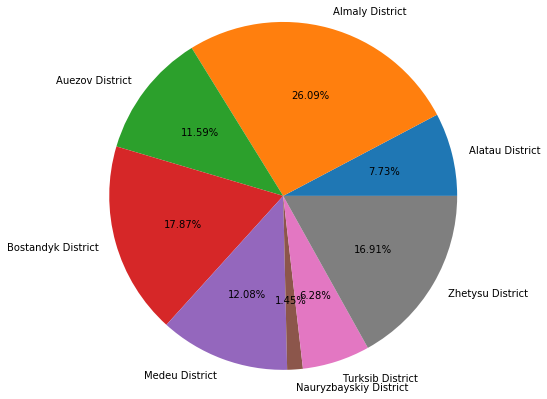

In [145]:
plt.pie(aggregated_table['n_companies'], labels= aggregated_table['address_borough'], radius = 2, autopct = '%0.2f%%')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

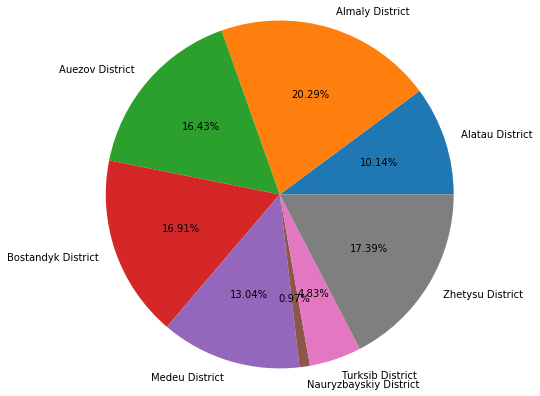

In [146]:
plt.pie(aggregated_table['n_of_banks'], labels= aggregated_table['address_borough'], radius = 2, autopct = '%0.2f%%')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

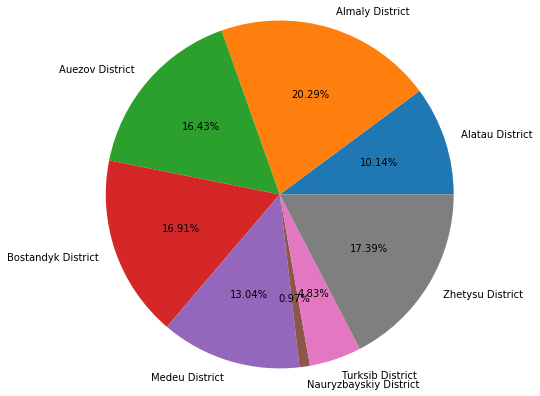

In [147]:
plt.pie(aggregated_table['n_of_molls'], labels= aggregated_table['address_borough'], radius = 2, autopct = '%0.2f%%')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

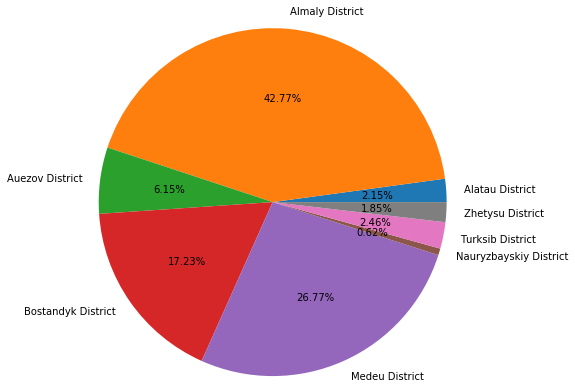

In [148]:
plt.pie(aggregated_table['n_of_pastimes'], labels= aggregated_table['address_borough'], radius = 2, autopct = '%0.2f%%')
plt.show

#### Our detailed analisys of all districts of Almaty city indicates that majority of Banks prefer open new branches in Almaly district due to higher concentration of companies, Trading Centers, cafes. The business opportunities of this district are much higher than others due to density of population, distances and well developed infrustructure.  

In [149]:
venues_map

In [150]:
aggregated_table

,address_borough,n_companies,populations,n_of_banks,pop_to_bank_ratio,n_of_molls,n_of_pastimes
0,Alatau District,16,260441.0,1.0,260441,21,7
1,Almaly District,54,215768.0,64.0,3371,42,139
2,Auezov District,24,295543.0,32.0,9235,34,20
3,Bostandyk District,37,343541.0,56.0,6134,35,56
4,Medeu District,25,209836.0,47.0,4464,27,87
5,Nauryzbayskiy District,3,128169.0,1.0,128169,2,2
6,Turksib District,13,235357.0,3.0,78452,10,8
7,Zhetysu District,35,166001.0,2.0,83000,36,6


## Thank you for watching my assignment!!!!

### Please pay your attention that service of FOURSQUARE is not very popular in this part of the world that's why a I had to use other sources. Another problem is that there is no proper JSON file to indicate disctricts on map along with labels. However i tried to gather all possible data to define a better location for Bank's business.